<a href="https://colab.research.google.com/github/veg90/Python_Basics/blob/main/Manipulaci%C3%B3n_de_datos_en_Python_Tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Relaciona la información del archivo "car1", con el archivo "car2" sin perder ningun registro.

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_car1 = pd.read_csv("/content/drive/MyDrive/Colab CSV Evilla/Tarea_1-SesionSincrona3/car1.csv") #Lee el archivo car1.csv  y lo deja en un dataframe
df_car2 = pd.read_csv("/content/drive/MyDrive/Colab CSV Evilla/Tarea_1-SesionSincrona3/car2.csv") #Lee el archivo car2.csv  y lo deja en un dataframe
df_car3 = pd.read_csv("/content/drive/MyDrive/Colab CSV Evilla/Tarea_1-SesionSincrona3/car3.csv") #Lee el archivo car3.csv  y lo deja en un dataframe
df_car4 = pd.read_csv("/content/drive/MyDrive/Colab CSV Evilla/Tarea_1-SesionSincrona3/car4.csv") #Lee el archivo car4.csv  y lo deja en un dataframe


In [ ]:
!pip show numpy
!pip show pandas

Name: numpy
Version: 1.21.6
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: yellowbrick, xgboost, xarray, xarray-einstats, wordcloud, torchvision, torchtext, tifffile, thinc, Theano-PyMC, tensorflow, tensorflow-probability, tensorflow-hub, tensorflow-datasets, tensorboard, tables, statsmodels, spacy, sklearn-pandas, seaborn, scs, scipy, scikit-learn, scikit-image, resampy, qdldl, PyWavelets, python-louvain, pystan, pysndfile, pymc3, pyerfa, pyemd, pycocotools, pyarrow, plotnine, patsy, pandas, osqp, opt-einsum, opencv-python, opencv-contrib-python, numexpr, numba, nibabel, netCDF4, moviepy, mlxtend, mizani, missingno, matplotlib, matplotlib-venn, lightgbm, librosa, Keras-Preprocessing, kapre, jpeg4py, jaxlib, jax, imgaug, imbalanced-learn, imageio, hyperopt, holoviews, h5py, gym, gensim, fo

In [ ]:
df_car1.head()

,submarca,modelo,vin
0,FIT,2016,4T4FD5SG48E
1,JETTA,2012,45SDG56SFSX
2,COROLLA,2014,9999F4397NM
3,SIENNA,2006,7JHFKA665AS
4,SWIFT,2018,HFDJK43K53K


In [ ]:
df_car2.head()


,marca,submarca
0,HONDA,FIT
1,HONDA,CIVIC
2,VOLKSWAGEN,JETTA
3,VOLKSWAGEN,BORA
4,TOYOTA,COROLLA


**Se utilizo Inner Join**

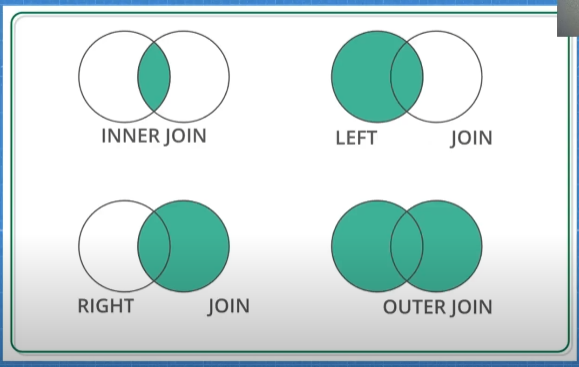

In [ ]:
mg_1_2 = pd.merge(df_car1,df_car2,how= "inner",left_index= False, right_index= False)
mg_1_2

,submarca,modelo,vin,marca
0,FIT,2016,4T4FD5SG48E,HONDA
1,JETTA,2012,45SDG56SFSX,VOLKSWAGEN
2,COROLLA,2014,9999F4397NM,TOYOTA
3,SIENNA,2006,7JHFKA665AS,TOYOTA
4,SWIFT,2018,HFDJK43K53K,SUSUKI


Relaciona la información resultante del punto anterior, con la información contenida en el archivo car3

In [ ]:
df_car3.head()

,vin,kms
0,4T4FD5SG48E,48000
1,45SDG56SFSX,150000
2,9999F4397NM,210000
3,7JHFKA665AS,197500


In [ ]:
mg_1_2_3 = pd.merge(mg_1_2,df_car3,how= "inner",left_index= False, right_index= False)
mg_1_2_3

,submarca,modelo,vin,marca,kms
0,FIT,2016,4T4FD5SG48E,HONDA,48000
1,JETTA,2012,45SDG56SFSX,VOLKSWAGEN,150000
2,COROLLA,2014,9999F4397NM,TOYOTA,210000
3,SIENNA,2006,7JHFKA665AS,TOYOTA,197500


Ya que tienes un DataFrame con la información de los archivos 1, 2, 3, junta esa información con el archivo car4, que tiene la misma estructura.

Hacer un renombrado de una columna para que el DataFrame final quede bien construido. 

In [ ]:
df_car4.head()

,vin,marca,submarca,modelo,recorrido
0,67576a5fga,AUDI,A4,2010,125000
1,kdahf68a6d,HONDA,ODISSEY,2007,200000
2,34rsfd324g,MAZDA,CX-5,2014,89000


In [ ]:
df_car4.rename(columns={"recorrido":"kms"},inplace=True)
df_car4

,vin,marca,submarca,modelo,kms
0,67576a5fga,AUDI,A4,2010,125000
1,kdahf68a6d,HONDA,ODISSEY,2007,200000
2,34rsfd324g,MAZDA,CX-5,2014,89000


**Se utilizo Outer Join**

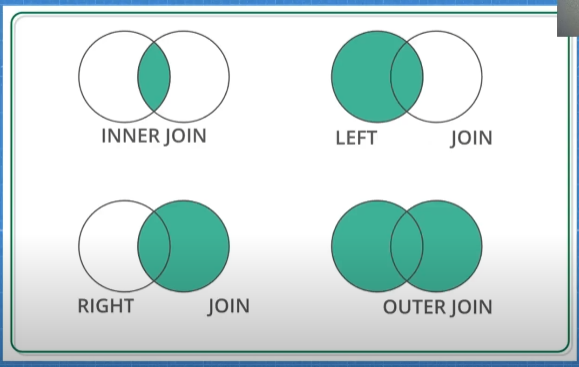

In [ ]:
mg_1_2_3_4 = pd.merge(mg_1_2_3, df_car4, how= "outer",left_index= False, right_index= False)
mg_1_2_3_4 

,submarca,modelo,vin,marca,kms
0,FIT,2016,4T4FD5SG48E,HONDA,48000
1,JETTA,2012,45SDG56SFSX,VOLKSWAGEN,150000
2,COROLLA,2014,9999F4397NM,TOYOTA,210000
3,SIENNA,2006,7JHFKA665AS,TOYOTA,197500
4,A4,2010,67576a5fga,AUDI,125000
5,ODISSEY,2007,kdahf68a6d,HONDA,200000
6,CX-5,2014,34rsfd324g,MAZDA,89000
